#Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

##Connect to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Loading Model

In [ ]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/f&v_dataset/trained_model_data.h5')

##Visualization And Performing Prediction On A single Image

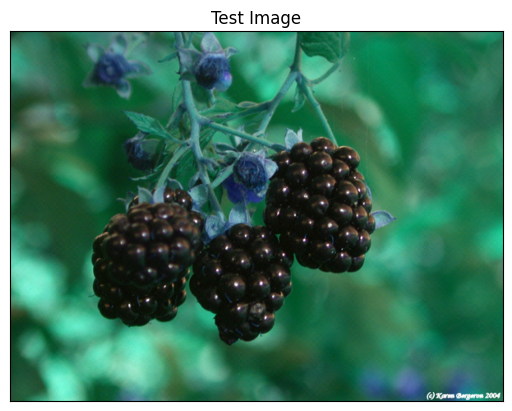

In [ ]:
import cv2
image_path = "/content/drive/MyDrive/fnv_dataset/test/banana"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  #converting single image to batch
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 29ms/step


In [ ]:
print(predictions[0])
print(max(predictions[0]))

[1.85871190e-24 7.22450580e-21 6.41814817e-25 1.13162767e-23
 2.83607840e-17 1.00000000e+00 8.45092191e-11 3.42484762e-21
 4.24650826e-25 4.72340193e-28 5.59611746e-29 2.47904520e-18
 7.44214028e-26 6.61363036e-24 4.54630015e-28 9.77366999e-18
 1.73183062e-30 2.43385891e-20 2.72194729e-13 3.08691397e-20
 2.66550681e-19 1.39524333e-30 3.39223058e-25 1.98060479e-09
 2.30526628e-25 3.47351848e-20 2.47421693e-26 4.50754194e-16
 7.23230690e-29 1.76114156e-18 1.59986313e-21 2.58076866e-27
 1.69671609e-14 1.05592718e-25 7.05241505e-28 7.09327148e-26
 1.28048076e-20 6.23747092e-21 2.47996266e-33 2.60136312e-15
 1.87169190e-22 3.04433666e-19 1.70075839e-23 7.71455972e-31
 2.71086958e-21 1.23823934e-25 1.37457170e-22 2.33546416e-20
 1.16330545e-20 5.22705244e-21 4.77237127e-30 4.77277188e-30
 6.92570186e-27 6.86168756e-29 1.66249608e-22]
1.0


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/f&v_dataset/Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 550 files belonging to 55 classes.


In [ ]:
test_set.class_names

['Apple',
 'Avocado',
 'Banana',
 'Beetroot',
 'Bell Pepper',
 'Blackberry',
 'Blueberry',
 'Cabbage',
 'Cantaloupe',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cherry',
 'Chickoo',
 'Chili Pepper',
 'Coconut',
 'Corn',
 'Cucumber',
 'Eggplant',
 'Fig',
 'Garlic',
 'Ginger',
 'Grapefruit',
 'Grapes',
 'Guava',
 'Jalepeno',
 'Kiwi',
 'Lady Finger',
 'Lemon',
 'Lettuce',
 'Lime',
 'Mango',
 'Olive',
 'Onion',
 'Orange',
 'Paprika',
 'Passion Fruit',
 'Peach',
 'Pear',
 'Peas',
 'Pineapple',
 'Plum',
 'Pomegranate',
 'Potato',
 'Pumpkin',
 'Raddish',
 'Raspberry',
 'Soy Beans',
 'Spinach',
 'Strawberry',
 'Sweet Corn',
 'Sweet Potato',
 'Tomato',
 'Turnip',
 'Watermelon']

In [ ]:
result_index = np.where(predictions[0]==max(predictions[0]))
print(result_index[0][0])

5


###Display Image

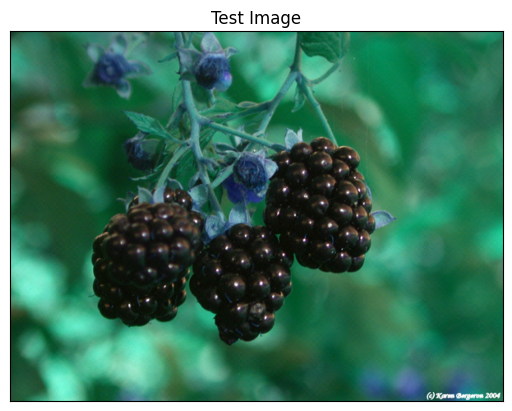

In [ ]:
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

###Single Prediction

In [ ]:
print('It is a "{}". '.format(test_set.class_names[result_index[0][0]]))

It is a "Blackberry". 


In [ ]:
test_set.class_names

['Apple',
 'Avocado',
 'Banana',
 'Beetroot',
 'Bell Pepper',
 'Blackberry',
 'Blueberry',
 'Cabbage',
 'Cantaloupe',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cherry',
 'Chickoo',
 'Chili Pepper',
 'Coconut',
 'Corn',
 'Cucumber',
 'Eggplant',
 'Fig',
 'Garlic',
 'Ginger',
 'Grapefruit',
 'Grapes',
 'Guava',
 'Jalepeno',
 'Kiwi',
 'Lady Finger',
 'Lemon',
 'Lettuce',
 'Lime',
 'Mango',
 'Olive',
 'Onion',
 'Orange',
 'Paprika',
 'Passion Fruit',
 'Peach',
 'Pear',
 'Peas',
 'Pineapple',
 'Plum',
 'Pomegranate',
 'Potato',
 'Pumpkin',
 'Raddish',
 'Raspberry',
 'Soy Beans',
 'Spinach',
 'Strawberry',
 'Sweet Corn',
 'Sweet Potato',
 'Tomato',
 'Turnip',
 'Watermelon']

In [ ]:
file = open("labels.txt","w")
for i in test_set.class_names:
  file.write(i+"\n")
file.close()

In [ ]:
with open("labels.txt") as f:
  content = f.readlines()

In [ ]:
content

['Apple\n',
 'Avocado\n',
 'Banana\n',
 'Beetroot\n',
 'Bell Pepper\n',
 'Blackberry\n',
 'Blueberry\n',
 'Cabbage\n',
 'Cantaloupe\n',
 'Capsicum\n',
 'Carrot\n',
 'Cauliflower\n',
 'Cherry\n',
 'Chickoo\n',
 'Chili Pepper\n',
 'Coconut\n',
 'Corn\n',
 'Cucumber\n',
 'Eggplant\n',
 'Fig\n',
 'Garlic\n',
 'Ginger\n',
 'Grapefruit\n',
 'Grapes\n',
 'Guava\n',
 'Jalepeno\n',
 'Kiwi\n',
 'Lady Finger\n',
 'Lemon\n',
 'Lettuce\n',
 'Lime\n',
 'Mango\n',
 'Olive\n',
 'Onion\n',
 'Orange\n',
 'Paprika\n',
 'Passion Fruit\n',
 'Peach\n',
 'Pear\n',
 'Peas\n',
 'Pineapple\n',
 'Plum\n',
 'Pomegranate\n',
 'Potato\n',
 'Pumpkin\n',
 'Raddish\n',
 'Raspberry\n',
 'Soy Beans\n',
 'Spinach\n',
 'Strawberry\n',
 'Sweet Corn\n',
 'Sweet Potato\n',
 'Tomato\n',
 'Turnip\n',
 'Watermelon\n']